In [2]:
import os
import pandas as pd
import glob

## Importa os arquivos para um dataframe

In [3]:
folder_threated = "resources/bases/tratada/"

In [64]:
all_files = glob.glob(folder_threated + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep="|", names=["position", "artist", "music"])
    df["year"] = filename.split("/")[-1].replace("_ok.txt", "")
    li.append(df)

df = pd.concat(li, ignore_index=True, sort=True)

list_total = len(li)

## Tratando alguns casos de exceção

In [79]:
df.loc[(df.music == 'HELP!'),'music']='HELP'
df.loc[(df.music == 'HEY, JUDE'),'music']='HEY JUDE'

In [66]:
df.head()

,artist,music,position,year
0,METALLICA,FUEL,500,2017
1,YES,CHANGES,499,2017
2,LINKIN PARK,IN THE END,498,2017
3,RUSH,XANADU,497,2017
4,SYSTEM OF A DOWN,CHOP SUEY!,496,2017


<AxesSubplot:xlabel='year'>

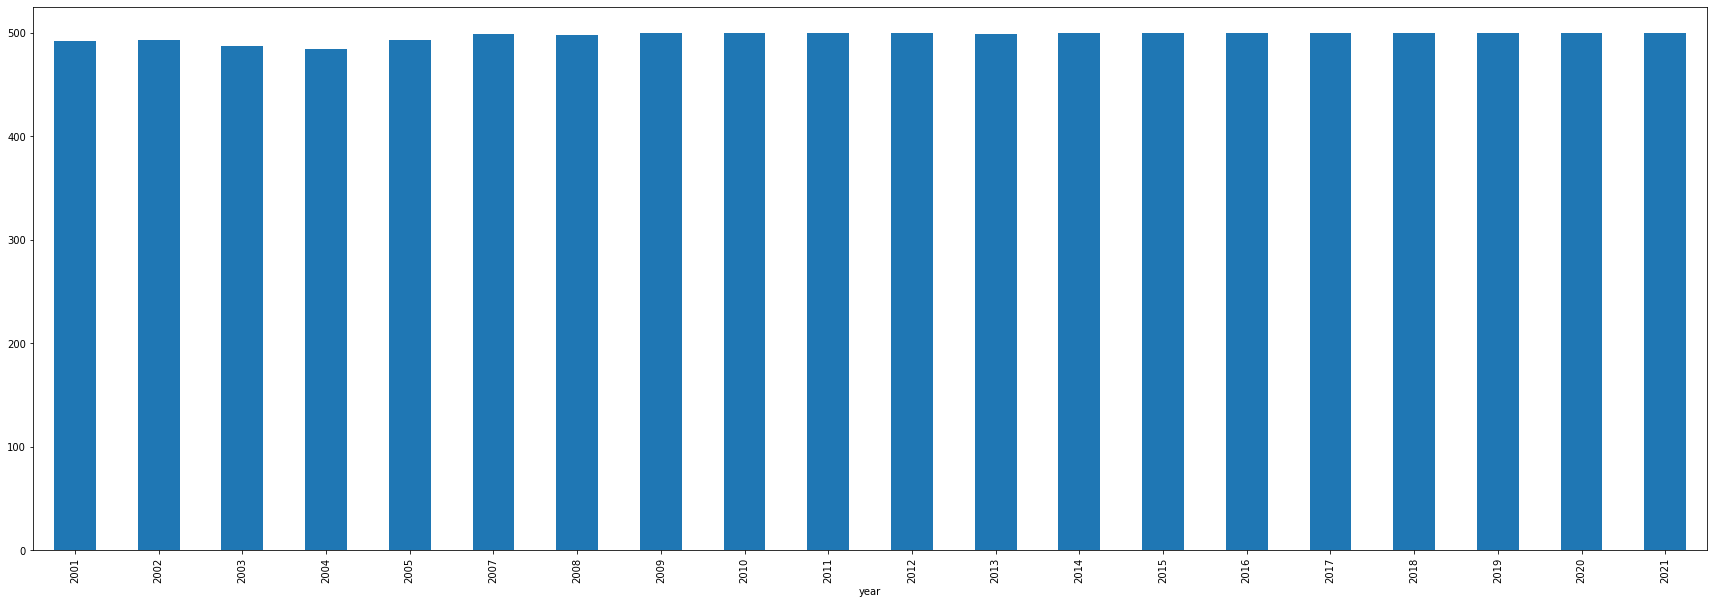

In [32]:
groups = df.groupby(['year']).size()
groups.plot.bar(figsize=(30,10))

In [58]:
print(f"Hoje temos {list_total} arquivos para trabalhar")

Hoje temos 20 arquivos para trabalhar


## Get TOP 10 artistas da lista

Somando todas as listas

In [41]:
df['artist'].value_counts()[:10]

LED ZEPPELIN    253
QUEEN           233
THE BEATLES     193
AEROSMITH       189
PINK FLOYD      175
RUSH            173
AC/DC           171
VAN HALEN       164
KISS            159
DEEP PURPLE     150
Name: artist, dtype: int64

## **Get TOP 10 músicas da lista**

Não resolve pegar só a música porque tem bandas com músicas com mesmo nome

In [42]:
df['music'].value_counts()[:10]

ONE                     26
LIKE A ROLLING STONE    23
DREAMS                  23
SOMEBODY TO LOVE        23
REVOLUTION              23
CHANGES                 23
TIME                    22
TURNER OVERDRIVE        21
DREAM ON                21
JAILBREAK               21
Name: music, dtype: int64

In [67]:
df_artists_music = df.groupby(['artist', 'music']).size().sort_values(ascending=False).reset_index(name='total')

## Quais/quantas músicas estão presentes em todas as listas ?

In [68]:
df_artists_music.head(20)

,artist,music,total
0,DEEP PURPLE,PERFECT STRANGERS,20
1,BACHMAN,TURNER OVERDRIVE,20
2,RUSH,TOM SAWYER,19
3,??,??,19
4,DIRE STRAITS,MONEY FOR NOTHING,19
5,LED ZEPPELIN,STAIRWAY TO HEAVEN,19
6,LED ZEPPELIN,BLACK DOG,19
7,LYNYRD SKYNYRD,SWEET HOME ALABAMA,19
8,GENESIS,MAMA,19
9,MIDNIGHT OIL,BEDS ARE BURNING,18


In [ ]:
df_artists_music.groupby('total').size().sort_values(ascending=False).reset_index(name='sum')

## Checar músicas com nomes iguais na base

In [29]:
df_artists_music[df_artists_music.duplicated(['music'])==True]

,artist,music,total
152,U2,ONE,12
321,BAUHAUS,ZIGGY STARDUST,8
328,FLEETWOOD MAC,DREAMS,7
333,THE ROLLING STONES,LIKE A ROLLING STONE,7
363,JEFFERSON AIRPLANE,SOMEBODY TO LOVE,7
...,...,...,...
2823,LYNYRD SKYNRYRD,SATURDAY NIGHT SPECIAL,1
2825,LOVIN’ SPOONFUL,DO YOU BELIEVE IN MAGIC,1
2828,LOS LOBOS,LA BAMBA,1
2833,LIVING COLOR,CULT OF PERSONALITY,1


In [30]:
df_artists_music[df_artists_music['music']=='LA BAMBA']

,artist,music,total
446,RITCHIE VALENS,LA BAMBA,6
2828,LOS LOBOS,LA BAMBA,1


## **Rankear as TOP das Tops**

Encontrar as músicas que melhores rankearam nas listas

Critério:
- score = 500 - posição. 

    Exemplo: 
        posição 1 será score = 500 - 1 = 499
        posição 500 será score = 500 - 500 = 0
        
O rank da música será a soma dos scores de cada lista.


In [80]:
df_rank = df
df_rank['score'] = 500 - df['position']

In [81]:
df_rank.head()

,artist,music,position,year,score
0,METALLICA,FUEL,500,2017,0
1,YES,CHANGES,499,2017,1
2,LINKIN PARK,IN THE END,498,2017,2
3,RUSH,XANADU,497,2017,3
4,SYSTEM OF A DOWN,CHOP SUEY!,496,2017,4


In [82]:
df_rank[(df_rank['artist']=='BEATLES')].sort_values('position')

,artist,music,position,year,score
7453,BEATLES,HELP,1,2011,499
4477,BEATLES,HEY JUDE,4,2002,496
3499,BEATLES,HELP,4,2004,496
8936,BEATLES,LOVE ME DO,9,2008,491
3990,BEATLES,HEY JUDE,9,2001,491
...,...,...,...,...,...
3962,BEATLES,I WANT TO HOLD YOUR HAND,481,2004,19
3968,BEATLES,PENNY LANE,487,2004,13
6945,BEATLES,I SHOULD HAVE KNOW BETTER,492,2003,8
3979,BEATLES,ELEANOR RIGBY,498,2004,2


In [83]:
df_rank[(df_rank['artist']=='PEARL JAM') & (df_rank['music']=='BLACK')].sort_values('year')

,artist,music,position,year,score
6506,PEARL JAM,BLACK,41,2003,459
3588,PEARL JAM,BLACK,100,2004,400
3455,PEARL JAM,BLACK,43,2007,457
8777,PEARL JAM,BLACK,168,2008,332
2936,PEARL JAM,BLACK,63,2009,437
5883,PEARL JAM,BLACK,84,2010,416
7417,PEARL JAM,BLACK,37,2011,463
5411,PEARL JAM,BLACK,56,2012,444
1561,PEARL JAM,BLACK,62,2013,438
916,PEARL JAM,BLACK,84,2014,416


In [85]:
df_rank.groupby(['artist', 'music'])['score'].agg('sum').sort_values(ascending=False)[:25]

artist         music             
LED ZEPPELIN   STAIRWAY TO HEAVEN    9467
DEEP PURPLE    SMOKE ON THE WATER    8772
AC/DC          BACK IN BLACK         8627
RUSH           TOM SAWYER            8621
LED ZEPPELIN   KASHMIR               8189
QUEEN          BOHEMIAN RHAPSODY     7957
BLACK SABBATH  PARANOID              7954
JETHRO TULL    AQUALUNG              7782
LED ZEPPELIN   BLACK DOG             7578
STEPPENWOLF    BORN TO BE WILD       7547
PINK FLOYD     TIME                  7537
DIRE STRAITS   SULTANS OF SWING      7484
PEARL JAM      BLACK                 7435
EAGLES         HOTEL CALIFORNIA      7415
DEEP PURPLE    PERFECT STRANGERS     7384
               BURN                  7335
AEROSMITH      DREAM ON              7250
AC/DC          HIGHWAY TO HELL       7228
PINK FLOYD     WISH YOU WERE HERE    7079
IRON MAIDEN    FEAR OF THE DARK      7030
BLACK SABBATH  IRON MAN              6955
VAN HALEN      JUMP                  6890
FOCUS          HOCUS POCUS           6853


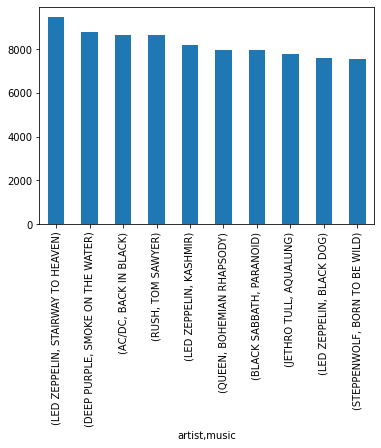

In [41]:
df_rank.groupby(['artist', 'music'])['score'].agg('sum').sort_values(ascending=False)[:10].plot(kind='bar');